### **Agenda**

1. Introduction
2. Getting Started

  A. Required Libraries

  B. Data Source

  C. Load and View data

  D. Tidy and Modify data

3. Exploratory Data Analysis
  
  A. Explore Price with **Environment**
  
      &emsp;a. Community
    
      &emsp;b. Subways

  B. Explore Price with **Internal Structure**

      &emsp;a. Renovation Condition

      &emsp;b. Kitchen

      &emsp;c. Living Room

  B. Explore Price of districts in Beijing

  C. Explore Price of each year of districts

4. Hypothesis Testing

  A. Null Hypothesis

  B. Regression with scikit-learn

  C. Regression with statsmodels

5. Machine Learning Prediction

6. Conclusion and Insights




<center><img src="http://scd.cn.rfi.fr/sites/chinese.filesrfi/imagecache/rfi_16x9_1024_578/sites/images.rfi.fr/files/aef_image/bj_6.jpg" alt="beijing" width="800" align="center" style="align: center;"/></center>



## **1. Introduction**

As the third largest country in the world, China has the world greatest population. Beijing, China's capital, has 2.154 million people at the end of 2018. One of the reasons of this overpopluation is the propersity of job opportunity and resources. Young people would come to Beijing searches for job positions, and old people would come to Beijing for better medical treatment. As a result, the shortage of housing supply becomes a serious problem in Beijing. What's worse is that Beijing's house price experienced a expoential growth after 2008. The rate of salary growth could not catch up with the speed at which housing price is increasing. As a result, people will have to take 30 to 40 years loan to pay off their house price. (2-3 million USD for a detached apartment)

This situation becomes so serious that caught up government's attention. Beijing government has been dedicated into issue policy restricting the flow of external residents, and supressing real estate agents' price raising. Many experts claimed that they think Major cities like Beijing, Guanzhou will experience a drop in price. Therefore, we want to discover whether there are factors impacting the house price besides social influence to set up a standard for people who are looking forward to purchase a house in Beijing so that they would know whether those houses they are looking at are good deals or not.

## **2. Getting Started**

### **A. Required Libraries**

Some of the libraries we used for this final tutorial include pandas, matplotlib, seaborn, numpy, folium, scikit-learn, statsmodels, and more.

Pandas: used for data display and partitioning

Datetime: used to extract years from datetime type

Matplotlib - pyplot: used for plotting Pandas data into graphs and charts

Folium: provides a mean to draw a real-life map of Beijing city

Seaborn: provides a high-level interface for graphics on top of Matplotlib

scikit-learn: a useful and reliable machine learning library

linear-model: used to calculate models for multiple linear regression

model_selection: used to split up dataset into test and training data and evaluate predictions

statsmodels.api: used to calculate models and statistics with multple linear regression

In [0]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from statsmodels import api as sm


###**B. Data Source**

We found a dataset in Kaggle on housing prices in Beijing from the year of 2012 to 2018. The dataset recorded over 300,000 housing transactions in Beijing, with details on, for example, the location, size and internal structure of the houses, as well as their transaction time and price per square meter. The dataset can be found [here](https://www.kaggle.com/ruiqurm/lianjia) for your reference.

###**C. Load and View Data**

After loading the .csv file, the info() function gives us a sense of what the entire dataset looks like. There are 26 columns total:


*   url: the url of the posting which the database owner fetched all the data from
*   id: the id of the transaction
* lng: the longitude of the house
* lat: the latitude of the house
* cid: the community id of the house
* tradeTime: the date of the transaction
* DOM: active days on the market. To learn more about DOM, see [here](https://en.wikipedia.org/wiki/Days_on_market)
* followers: the number of people following the transaction
* totalPrice: total price of the house, calculated by price * square
* price: price per square meter
* square: house size in square meters. 1 square meter is about 10.764 square foot
* livingRoom: the number of living rooms in the house
* drawingRoom: the number of drawing rooms in the house
* kitchen: the number of kitchens in the house
* bathroom: the number of bathrooms in the house
* floor: which floor the house is on. Notice that when we talk about Chinese housing, especially in cities, we are most likely talking about something closer to an apartment in the American sense. 
* buildingType: type of the building. This includes tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
* constructionTime: the year in which the house is constructed
* renovationCondition: renovation condition of the house. This includes other( 1 ), rough( 2 ),Simplicity( 3 ) and hardcover( 4 ).
* buildingStructure: includes unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
* ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It shows how many ladders a resident have on average.
* elevator: if the house (building) has an elevator
* fiveYearsProperty: if the owner have the property for less than 5 years
* subway: if the house is close to subway station(s)
* district: in which district the house is located
* communityAverage: the community average price of the community


In [0]:
house_price = pd.read_csv("new.csv", encoding = 'iso-8859-1',low_memory = False)
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

As we can see, some of the columns, such as DOM (active days on market) and buildingType have some rows missing--depending on what we want to run our analysis on, we need to be aware of these missing data and drop/sample accordingly.

Describe() gives us a sense of the distribution of the data. This only gives distributions on columns with a numeric type.

In [0]:
house_price.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


###**D. Tidy and modifying data**

First of all, we decided to drop some columns as they would be irrelevant for our analysis.

In [0]:
house_price = house_price.drop(columns = ['url', 'floor', 'id', 'Cid', 'DOM'])
# house_price = house_price.drop(columns = ['livingRoom', 'drawingRoom', 'kitchen', 'bathRoom'])

As we can see from the info() call above, some of the columns should have a numerical type but were instead an object type. Some examples would be number of livingrooms, number of drawing rooms, number of bathrooms, and floor number. In order for a better analysis, we decided to convert them into type integer. As we were doing the conversion, though, we discovered that the reason why they were of type object was that there were string values in some of the rows indicating missing information or errors, and as a result, we converted those string cells into NaN and dropped them to ensure a clean typed dataset for analysis below.

In [0]:
house_price['livingRoom'] = house_price['livingRoom'].apply(pd.to_numeric, errors='coerce').fillna(0)
house_price['livingRoom'] = house_price['livingRoom'].astype(int).dropna()
house_price['drawingRoom'] = house_price['drawingRoom'].apply(pd.to_numeric, errors='coerce').fillna(0)
house_price['drawingRoom'] = house_price['drawingRoom'].astype(int).dropna()
house_price['bathRoom'] = house_price['bathRoom'].apply(pd.to_numeric, errors='coerce').fillna(0)
house_price['bathRoom'] = house_price['bathRoom'].astype(int).dropna()
# house_price['floor'] = house_price['floor'].apply(pd.to_numeric, errors='coerce').fillna(0)
# house_price['floor'] = house_price['floor'].astype(int).dropna()
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 21 columns):
Lng                    318851 non-null float64
Lat                    318851 non-null float64
tradeTime              318851 non-null object
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null int64
drawingRoom            318851 non-null int64
kitchen                318851 non-null int64
bathRoom               318851 non-null int64
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null int64
ladderRatio            318851 non-null float64
elevator               318819 non-null float64
fiveYearsProperty      318819 non-null float64
subway                 318819 non-null float64
district      

As we can see, the types for the aforementioned columns are of type int64 now.

In order to compare the housing prices over the years, we need to extract the year of each transaction from tradeTime, and put them into a new column called 'year'. A simple for loop will do the trick.

In [0]:
house_price.insert(3, 'year', '')
for index, row in house_price.iterrows():
    house_price.at[index,'year'] = str(row['tradeTime'])[0:4]
house_price['year']=house_price['year'].astype(float)
house_price.head()

,Lng,Lat,tradeTime,year,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,2016.0,106,415.0,31680,131.00,2,1,1,1,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,2016.0,126,575.0,43436,132.38,2,2,1,2,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,2016.0,48,1030.0,52021,198.00,3,2,1,3,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,2016.0,138,297.5,22202,134.00,3,1,1,1,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,2016.0,286,392.0,48396,81.00,2,1,1,1,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


The numbering of the dictricts seemed really arbitrary and didn't seem to convey any meaning, so we thought it's more informative if we convert them into real district names. The conversion is based on [this discussion post](https://www.kaggle.com/ruiqurm/lianjia/discussion/82942).



In [0]:
house_price.insert(17, 'districtName', '')
for index, row in house_price.iterrows():
    if(row['district'] == 1):
      house_price.at[index,'districtName'] = 'DongCheng'
    elif (row['district'] == 2):
      house_price.at[index,'districtName'] = 'FengTai'
    elif (row['district'] == 3):
      house_price.at[index,'districtName'] = 'DaXing'
    elif (row['district'] == 4):
      house_price.at[index,'districtName'] = 'FaXing'
    elif (row['district'] == 5):
      house_price.at[index,'districtName'] = 'FangShang'
    elif (row['district'] == 6):
      house_price.at[index,'districtName'] = 'ChangPing'
    elif (row['district'] == 7):
      house_price.at[index,'districtName'] = 'ChaoYang'
    elif (row['district'] == 8):
      house_price.at[index,'districtName'] = 'HaiDian'
    elif (row['district'] == 9):
      house_price.at[index,'districtName'] = 'ShiJingShan'
    elif (row['district'] == 10):
      house_price.at[index,'districtName'] = 'XiCheng'
    elif (row['district'] == 11):
      house_price.at[index,'districtName'] = 'TongZhou'
    elif (row['district'] == 12):
      house_price.at[index,'districtName'] = 'ShunYi'
    elif (row['district'] == 13):
      house_price.at[index,'districtName'] = 'MenTouGou'
house_price.head()

,Lng,Lat,tradeTime,year,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,districtName,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,2016.0,106,415.0,31680,131.00,2,1,1,1,1.0,2005,3,6,0.217,ChaoYang,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,2016.0,126,575.0,43436,132.38,2,2,1,2,1.0,2004,4,6,0.667,ChaoYang,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,2016.0,48,1030.0,52021,198.00,3,2,1,3,4.0,2005,3,6,0.500,ChaoYang,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,2016.0,138,297.5,22202,134.00,3,1,1,1,1.0,2008,1,6,0.273,ChangPing,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,2016.0,286,392.0,48396,81.00,2,1,1,1,4.0,1960,2,2,0.333,DongCheng,0.0,1.0,1.0,1,62588.0


Now according to each district's distance to the center of the city (Tiananmen Square), we decided to rearrange the district numbers. From 1 to 13, the lower the district number, the farther away it is from the center. We did this based on our suspicion that the location of the houses has impact on housing prices, so districts that are closer to the center of the city get a higher (better) district "score" for our future analysis. 

A map of Beijing districts is attached here for reference.
<center><img src="http://d121tcdkpp02p4.cloudfront.net/clim/57877/Map-of-Beijing-districts-1524746140.JPG" alt="beijing_districts" width="400" align="center"/></center>

In [0]:
for index, row in house_price.iterrows():
    if(row['districtName'] == 'MenTouGou'):
      house_price.at[index,'district'] = 1
    elif (row['districtName'] == 'ShunYi'):
      house_price.at[index,'district'] = 2
    elif (row['districtName'] == 'TongZhou'):
      house_price.at[index,'district'] = 3
    elif (row['districtName'] == 'FangShang'):
      house_price.at[index,'district'] = 4
    elif (row['districtName'] == 'FaXing'):
      house_price.at[index,'district'] = 5
    elif (row['districtName'] == 'ChangPing'):
      house_price.at[index,'district'] = 6
    elif (row['districtName'] == 'DaXing'):
      house_price.at[index,'district'] = 7
    elif (row['districtName'] == 'ShijingShan'):
      house_price.at[index,'district'] = 8
    elif (row['districtName'] == 'FengTai'):
      house_price.at[index,'district'] = 9
    elif (row['districtName'] == 'ChaoYang'):
      house_price.at[index,'district'] = 10
    elif (row['districtName'] == 'HaiDian'):
      house_price.at[index,'district'] = 11
    elif (row['districtName'] == 'DongCheng'):
      house_price.at[index,'district'] = 12
    elif (row['districtName'] == 'XiCheng'):
      house_price.at[index,'district'] = 13
house_price.head()

,Lng,Lat,tradeTime,year,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,districtName,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,2016.0,106,415.0,31680,131.00,2,1,1,1,1.0,2005,3,6,0.217,ChaoYang,1.0,0.0,1.0,10,56021.0
1,116.453917,39.881534,2016-07-28,2016.0,126,575.0,43436,132.38,2,2,1,2,1.0,2004,4,6,0.667,ChaoYang,1.0,1.0,0.0,10,71539.0
2,116.561978,39.877145,2016-12-11,2016.0,48,1030.0,52021,198.00,3,2,1,3,4.0,2005,3,6,0.500,ChaoYang,1.0,0.0,0.0,10,48160.0
3,116.438010,40.076114,2016-09-30,2016.0,138,297.5,22202,134.00,3,1,1,1,1.0,2008,1,6,0.273,ChangPing,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,2016.0,286,392.0,48396,81.00,2,1,1,1,4.0,1960,2,2,0.333,DongCheng,0.0,1.0,1.0,12,62588.0


With over 300,000 entries, it's impossible to process all of them without crashing everything. Pandas Dataframe's sample function choses 2000 rows uniformly at random for processing, and this sample should be a good representation of the overall housing price records.

In [0]:
df = house_price.sample(n=2000)
df.head()

,Lng,Lat,tradeTime,year,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,districtName,elevator,fiveYearsProperty,subway,district,communityAverage
49433,116.432684,40.077562,2016-12-20,2016.0,10,555.0,40084,138.46,3,1,1,2,1.0,2008,1,6,0.250,ChangPing,1.0,1.0,0.0,6,38384.0
26003,116.342325,39.987903,2016-08-26,2016.0,13,614.8,103189,59.58,2,1,1,1,4.0,1995,4,2,0.500,HaiDian,0.0,1.0,1.0,11,128755.0
51958,116.147926,39.730421,2017-01-16,2017.0,39,294.0,31819,92.40,2,1,1,1,1.0,2006,4,6,0.333,FangShang,1.0,1.0,1.0,4,31088.0
124506,116.457117,39.971046,2012-04-28,2012.0,0,157.0,27443,57.21,2,1,1,1,4.0,1993,1,2,0.333,ChaoYang,0.0,1.0,1.0,10,64989.0
14238,116.193900,39.923648,2016-07-30,2016.0,78,194.0,33203,58.43,2,1,1,1,4.0,1987,3,2,0.333,ShiJingShan,0.0,1.0,1.0,9,44959.0


##**3. Exploratory Data Analysis**

First of all, the locations of the housing transactions are still pretty arbitrary if we only look at the longitude and latitude. So we thought it's a good idea to map them out using folium. The darker the circle, the higher the housing price.

In [0]:
Beijing = folium.Map(location = [39.90750, 116.397230], zoom_start = 11)
for idx, row in df.iterrows():
    folium.Circle(location = [row['Lat'], row['Lng']], radius = 300, 
                      color = row['price'], fill = True).add_to(Beijing)
Beijing

Next, we thought a heatmap would be helpful for getting an idea of what might correlate to housing prices. 

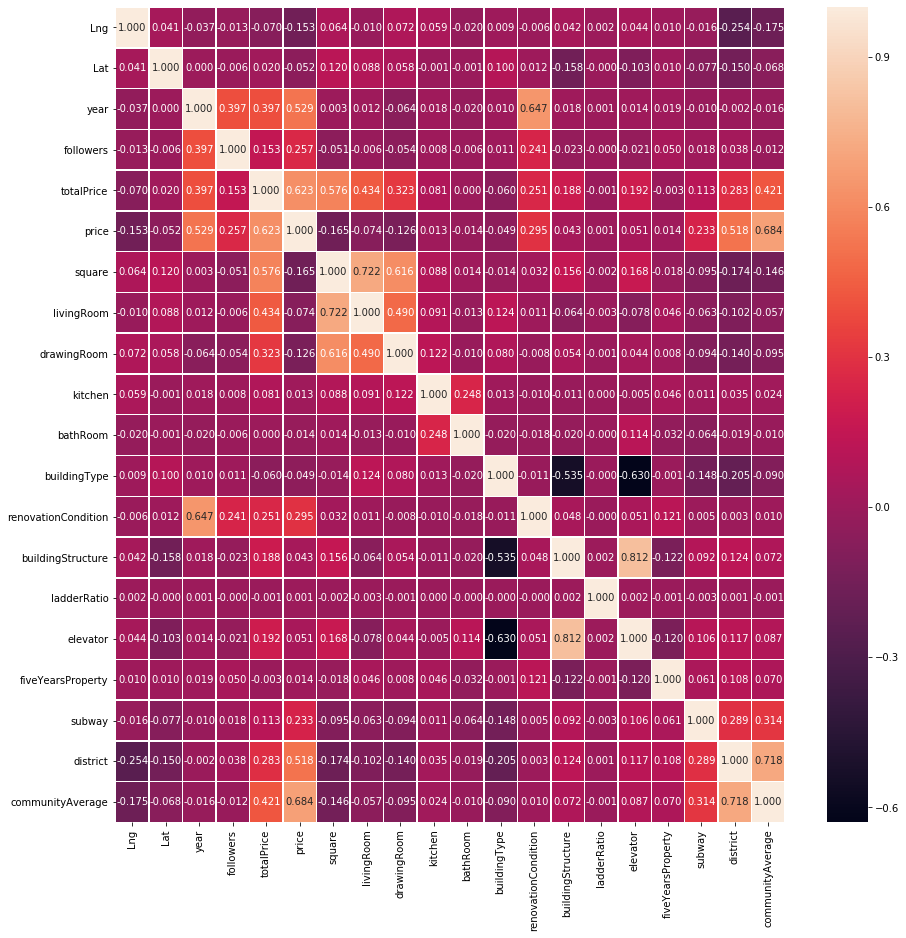

In [0]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(house_price.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()

According to the heatmap, some factors stood out to us with very high correlation to house price. For example, year has a correlation of 0.529, and community has a correlation of 0.684. 
Hence, we pick the several factors with highest ratio to analysis in the following sections.

###**A. Price vs Environment**

####(a) Community

The enviornment of the community is believed to be very important to the price of the house. A good community has, for example, a good security system, a good school nearby, etc. and therefore will have a higher price. In the graph below, we try to plot for the relationship between price and community average price.

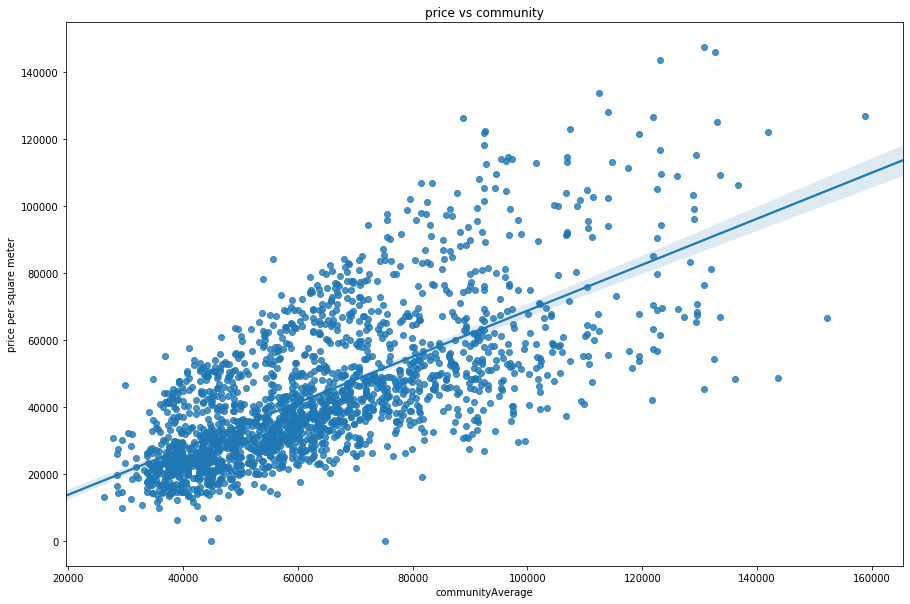

In [0]:
ax = sns.regplot(x='communityAverage', y='price', data=df)
plt.xlabel('communityAverage')
plt.ylabel('price per square meter')
plt.title("price vs community")
plt.show()

Supporting by seaborn, we are able to plot all the data points between price and community. Then, seaborn draw a best fit line across the dots.

The plot shows that it is very likely there exists a positive correlation between community average and price.

####(b) Subways
<center><img src="https://www.travelchinaguide.com/images/map/beijing/beijing-subway.gif" alt="beijing_subways" width="1000" align="center"/></center>
Subway is one of the famous constructions in Beijing city. It is very well-developed that the subway network spread through the entire city. People could use subway travel to every corner of the city with very low cost. 

Hence, subway becomes another important factor of the house/apartment price in terms of accessibility, in this case, if it's easily accessible by subway. In the graph below we examine the relationship between housing price and if the house if close to a subway station.

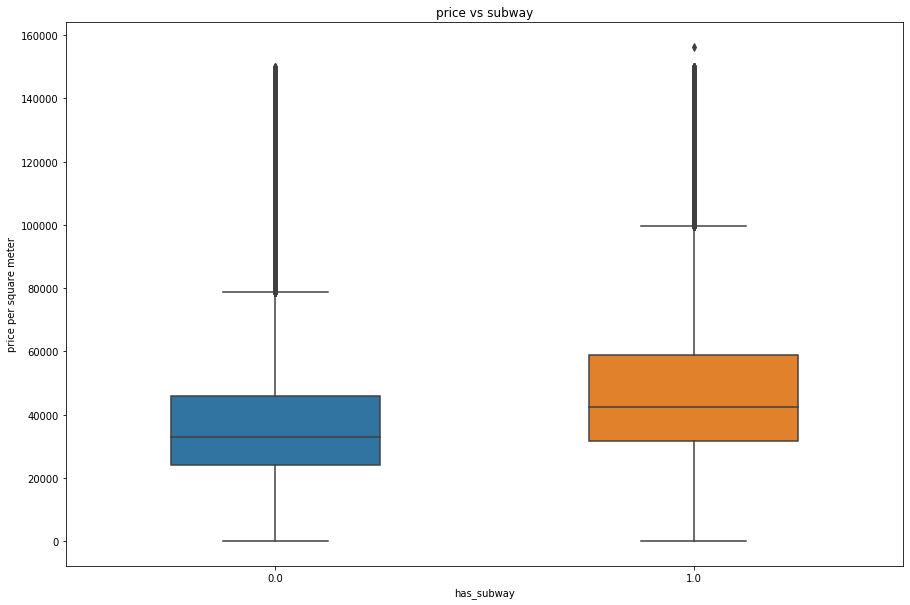

In [0]:
ax = sns.boxplot(x='subway', y='price', data=house_price, width = 0.5)
plt.xlabel('has_subway')
plt.ylabel('price per square meter')
plt.title("price vs subway")
plt.show()

As we can see from the graph, it is obvious that house/apartment with a subway station nearby has a significantly higher median, as well as first and third quartile.

So whether having a subway should be one of the determing factor of house price.

###**B. Price vs Internal Structure**

####(1) Renovation Condition

Next, we take house condition into consideration. The renovation condition of the house is ranked from 0 to 4, with 0 being missing data, 1 being "other", 2 being "rough", 3 being "simplicity", and 4 being "hardcover". It might be intuitive to think that a house with nicer internal condition would be more expensive than one without any decorations inside. 

Our graph below indeed shows that the nicer the renovation condition, the higher the price. However, the prices between "simplicity" and "hardcover" houses are not that much different.

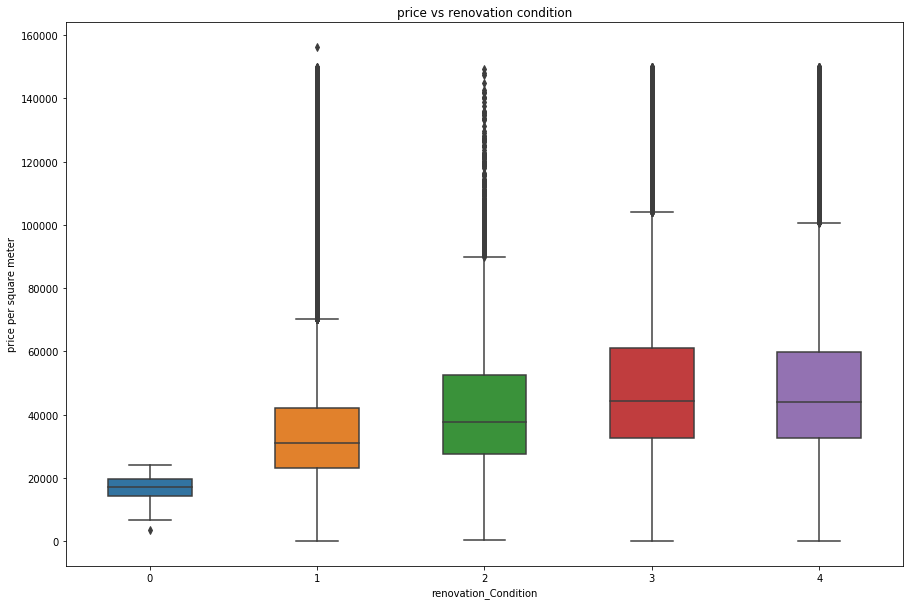

In [0]:
ax = sns.boxplot(x='renovationCondition', y='price', data=house_price, width = 0.5)
plt.xlabel('renovation_Condition')
plt.ylabel('price per square meter')
plt.title("price vs renovation condition")
plt.show()

Besides the renovation condition, the next two sections plot the relationship between the internal structure of the house and the house price. More specifically we wanted to see if number of kitchens and living rooms have anything to do with housing price.
####(2) Kitchen

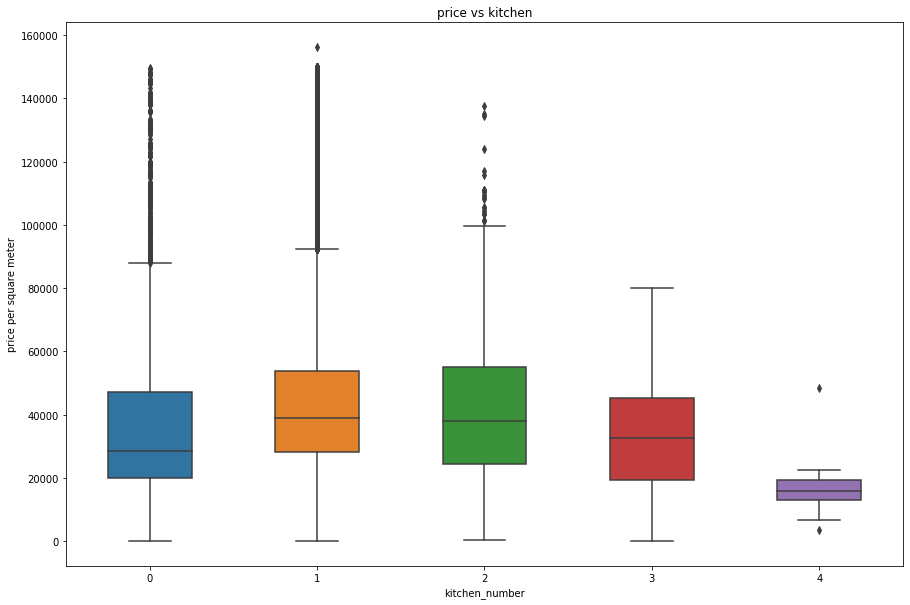

In [0]:
ax = sns.boxplot(x='kitchen', y='price', data=house_price, width = 0.5)
plt.xlabel('kitchen_number')
plt.ylabel('price per square meter')
plt.title("price vs kitchen")
plt.show()

As shown above, the price of houses with one kitchen is significantly higher than those without a kitchen, but otherwise the number of kitchens doesn't seem to have a large effect on house prices.

####(3) Living Room

With high space occupation per capita, a house with great number of living room is very rare. Intuitively, people would charge higher price since there is short in supply. So we discovered into the relationship between the house price and the numbner of living room

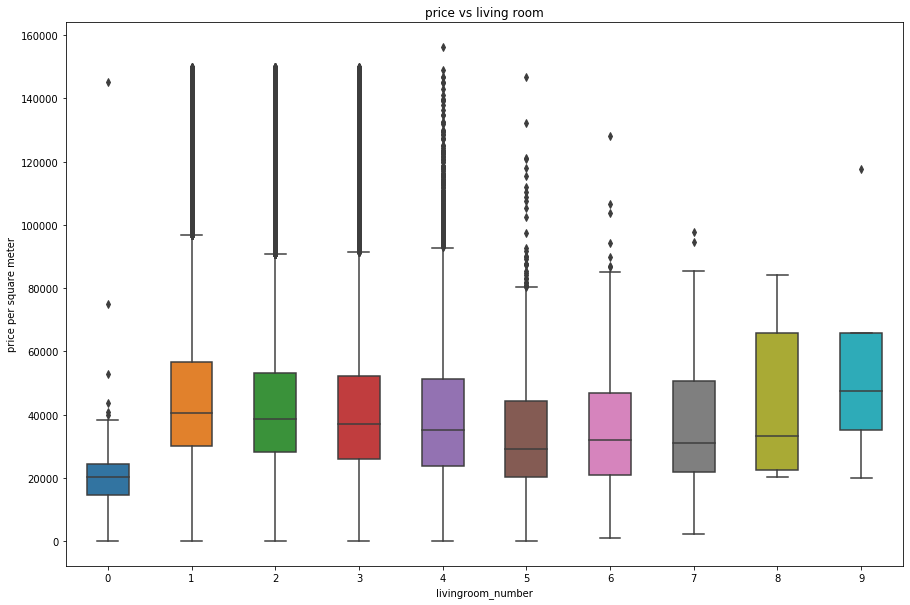

In [0]:
ax = sns.boxplot(x='livingRoom', y='price', data=house_price, width = 0.5)
plt.xlabel('livingroom_number')
plt.ylabel('price per square meter')
plt.title("price vs living room")
plt.show()

Similar to number of kitchens, houses without a living room are generally significantly cheaper than those with living rooms (with exceptions of outliers of course), but the number of living rooms doesn't seem to have too much effect on the price.

###**C. Price vs District**
As we mentioned above, the districts (in terms of how far they are from the center of the city) has significant impact on the housing price. The below scatter plot shows the location of the houses with colored districts. With the district numbers rearranged, it's clear to see that the higher the district number is, the more central the location. 

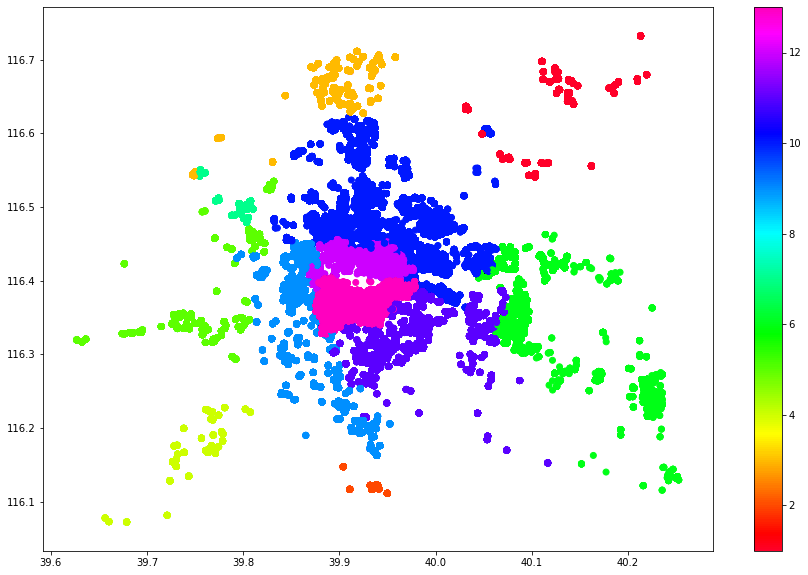

In [0]:
fig = plt.scatter(x = house_price['Lat'], y = house_price['Lng'], c = house_price['district'], \
                  cmap=plt.get_cmap('gist_rainbow'))
plt.colorbar(fig)
plt.show()

In order the find out more about the relationship between district and price, we decided to include the box plot below, illustrating the price grouped by districts. 

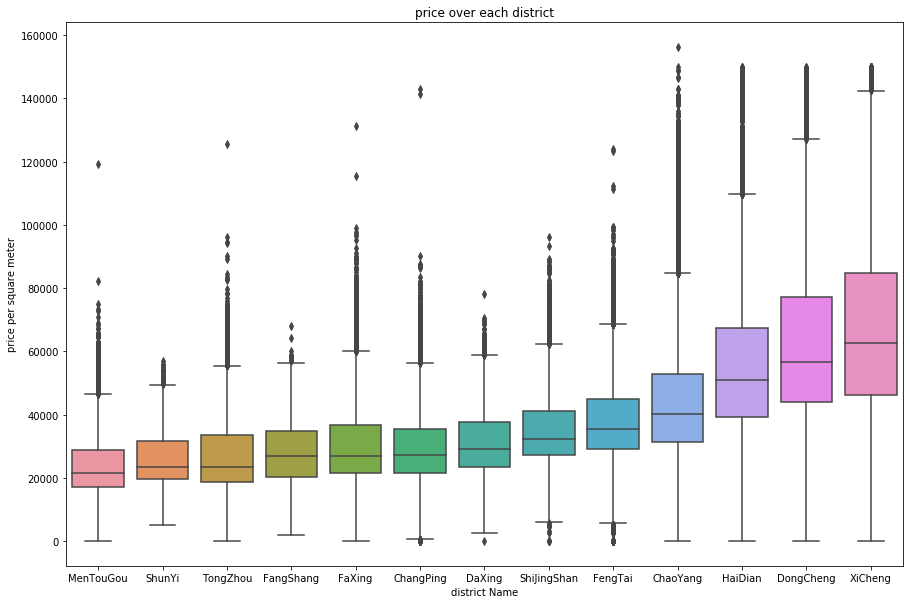

In [0]:
plt.rcParams["figure.figsize"]=15,10
order = house_price.groupby(by = ['districtName'])['price'].median()
order = order.sort_values(ascending = True)
order = order.index
ax = sns.boxplot(x='districtName', y='price',data=house_price, order = order)
plt.title("price over each district")
plt.xlabel('district Name')
plt.ylabel('price per square meter')
plt.show()

The result is working very much in our favor--districts with higher district number have generally higher price. While houses in MenTouGou (district number = 1) have a median price of a little over 20000 per square meter, houses in XiCheng district (district number = 13) have a median price of around 60000 per square meter.

###**D. Price vs Year**

Time is the most direct influencer of Beijing's house price. To illustrate this point, we have created a scatter plot below and drew a regression line across the plot to show that there is very likely a linear relationship between year and price per square meter. As the year increases, the house price also tends to increase.

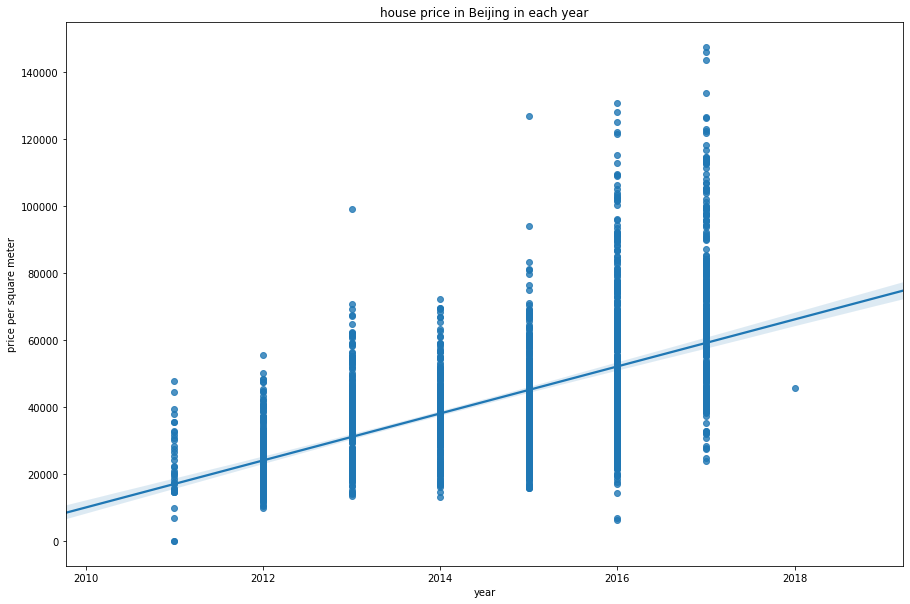

In [0]:
plt.rcParams["figure.figsize"]=15,10
ax = sns.regplot(x = 'year', y = 'price', data = df)
plt.title("house price in Beijing in each year")
plt.xlabel('year')
plt.ylabel('price per square meter')
plt.show()

However, the relationship supported by the scatter plot is very week. Hence, we took out the district as one of the influencial factors and extract median of the house price in each district as a measure of overall price each district each year. Firstly, we made a deep copy of the original dataset and only kept the price, year and districtName columns.

In [0]:
price_vs_year = house_price.copy(deep = True)
price_vs_year = price_vs_year[['price', 'year', 'districtName']]
price_vs_year.head()

,price,year,districtName
0,31680,2016.0,ChaoYang
1,43436,2016.0,ChaoYang
2,52021,2016.0,ChaoYang
3,22202,2016.0,ChangPing
4,48396,2016.0,DongCheng


We group the dataset by their district name and compute the median of the price in each district in each year.

In [0]:
est_p_y = price_vs_year.groupby(['year', 'districtName'], as_index = False).median()
est_p_y.head(20)

,year,districtName,price
0,2002.0,ChangPing,17053.0
1,2002.0,ChaoYang,20625.5
2,2003.0,FengTai,26923.0
3,2008.0,ChangPing,22195.0
4,2009.0,XiCheng,26964.0
5,2010.0,ShiJingShan,14885.0
6,2010.0,ShunYi,15380.0
7,2010.0,XiCheng,23566.0
8,2011.0,ChangPing,13896.0
9,2011.0,ChaoYang,23557.0


There are only 2 entries for the year of 2002 and 1 entry for the year of 2003, and the data jumped straight to 2008. We thought that the year gap between 2003 and 2008 is too big and that it might mess up our analysis, and therefore decided to drop the years 2002 and 2003 and only focus on the data after 2008.

In [0]:
est_p_y = est_p_y[est_p_y['year'] > 2008]
est_p_y.head(20)

,year,districtName,price
4,2009.0,XiCheng,26964.0
5,2010.0,ShiJingShan,14885.0
6,2010.0,ShunYi,15380.0
7,2010.0,XiCheng,23566.0
8,2011.0,ChangPing,13896.0
9,2011.0,ChaoYang,23557.0
10,2011.0,DaXing,19213.0
11,2011.0,DongCheng,30978.0
12,2011.0,FaXing,14796.0
13,2011.0,FengTai,21245.0


Now that we have the median price of each district of each year (after 2008), we put the data into the graph below to see the change in housing price across the years in each district.

[]

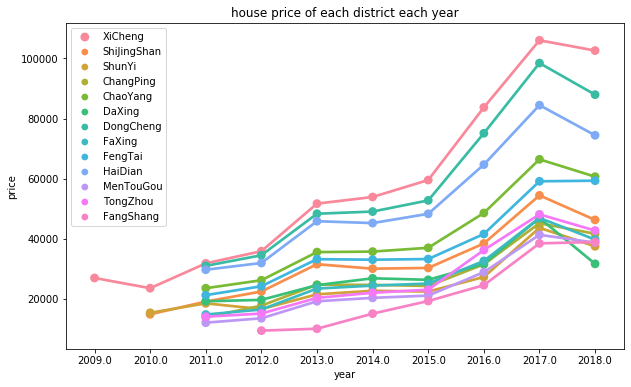

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(x = 'year', y = 'price', hue = 'districtName', data = est_p_y)
ax.set_title("house price of each district each year")
ax.set_xlabel('year')
ax.set_ylabel('price')
ax.legend()
plt.plot()


##**4. Hypothesis Testing**
**A. Null Hypothesis**

So we have looked at several factors that could have impacts on Beijing's house price:
1. Environment(Subway, Community)

2. Internal Structure(Renovation, kitchen, living Room)

3. District

4. Year

**Null Hypothesis: All four factors have no obvious impacts on Beijing's house price**

To reject the null hypothesis, we will perform mutiple linear regression with scikit-learn and statsmodel

###**B. Multiple Linear Regression with scikit-learn**

Starting with scikit-learn, we take out all the relevant columns and created two dataframe for regression analysis
1. control variables are year, renovationCondition, has_subway, district, communityAverage
2. target variable is the price

In [0]:
df_test = house_price.copy(deep = True)
df_test = df_test[['year', 'renovationCondition', 'subway', 'district', 'price', 'communityAverage']]
df_test = df_test.sort_values(by = ['year', 'renovationCondition', 'subway', 'district'],\
                              ascending=True, na_position='first')
df_test = df_test.reset_index()
df_test = df_test.drop(columns= ['index'], axis = 1)
df_test.head()

,year,renovationCondition,subway,district,price,communityAverage
0,2002.0,1,0.0,6,17053,47574.0
1,2002.0,1,1.0,10,14210,43307.0
2,2002.0,1,1.0,10,27041,65595.0
3,2003.0,1,1.0,9,26923,48853.0
4,2008.0,1,1.0,6,22195,50205.0


In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

factors = ['year', 'renovationCondition', 'subway', 'district', 'communityAverage']

df_test = df_test.dropna()

target = df_test[['price']]
control = df_test[factors]

X = control
Y = target['price']

linear = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
linear.fit(x_poly, Y)
linear.score(x_poly, Y)

0.8522506878437425

The R-squared score shows us how well the variance is explained by the model. For such a huge database, we created a relation model that 85.2% variance is explained by our model.

###**C. Multiple Linear Regression with statsmodel**

To gain further insight into our model, we use Ordinary Least Squares Regression model to estimate our parameters. OLS basically aims to minimize the sum of the squared distances between the actual values in the dataset and the predicted values generated by the regression line.

In [0]:
model_Y = Y
model_X = X

result = sm.OLS(model_Y, model_X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          6.542e+05
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                        0.00
Time:                        02:42:51   Log-Likelihood:                     -3.5015e+06
No. Observations:              318356   AIC:                                  7.003e+06
Df Residuals:                  318351   BIC:                                  7.003e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
year                   -6.0861      0.050   -122.858      0.000      -6.183      -5.989
renovationCondition  4784.6348     19.575    244.420      0.000    4746.268    4823.002
subway                642.2834     55.417     11.590      0.000     533.667     750.900
district              408.2566     12.572     32.472      0.000     383.615     432.898
communityAverage        0.6161      0.002    368.562      0.000       0.613       0.619
==============================================================================
Omnibus:                    44787.171   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90015.498
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       4.930   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-square in OLS model is even higher, meaning more variance is explained by our model under OLS.

Looking at coefficients, we can see renovation condition has a strong relationship towards price. And more importantly, looking at p values, we can tell all five variables have impacts on Beijing's house price. Having p value greater than 0.05 means the variable is has low significance in the model. However, all five variables have p values smaller than 0.001, way lower than the critical values. It represents all five variables have great significance in the model.

All the ratios in OLS model explained why we can reject the null hypothesis and the five variables, year, renovationCondition, has_subway, district, communityAverage do have obvious impact on Beijing's house price

##**5. Machine Learning Prediction**

A. Predict with Train/Test split

In this section, we will split both two variables into training and testing data. X_train, and y_train will be used to generate/train a multiple linear regression model. Then, we will plug in X_test in to the model to produced predicted price, which will be compared to y_test results.

In addition, since we used five variables in X and the data size is tremendous, we choose 80% data to train the model and test the results with the rest 20% data

In [0]:
# create training and testing data from same X and y used in regression above
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

# create and fit the model
linear = LinearRegression()
train_model = linear.fit(X_train, y_train)

# generate predictions for Beijing house price to compare with y_test data
predict_price = linear.predict(X_test)

# display first 10 results of our predicted house price
predict_price[0:10]

array([28356.32024064, 49301.62733034, 33892.91843357, 43215.34222188,
       52213.27365627, 79015.09975437, 60122.3667632 , 57253.33461707,
       63994.19272078, 48887.19904029])

Now we have created training all the data, and predicted the prices using X_test data as inputs.

We will then visulize the result by ploting the actual values against predicted values of Beijing's house price. By adding an additional line of y_test, to show how close our prediction close to the actual results(y_test). The closer those points to the line, the better the prediction is.

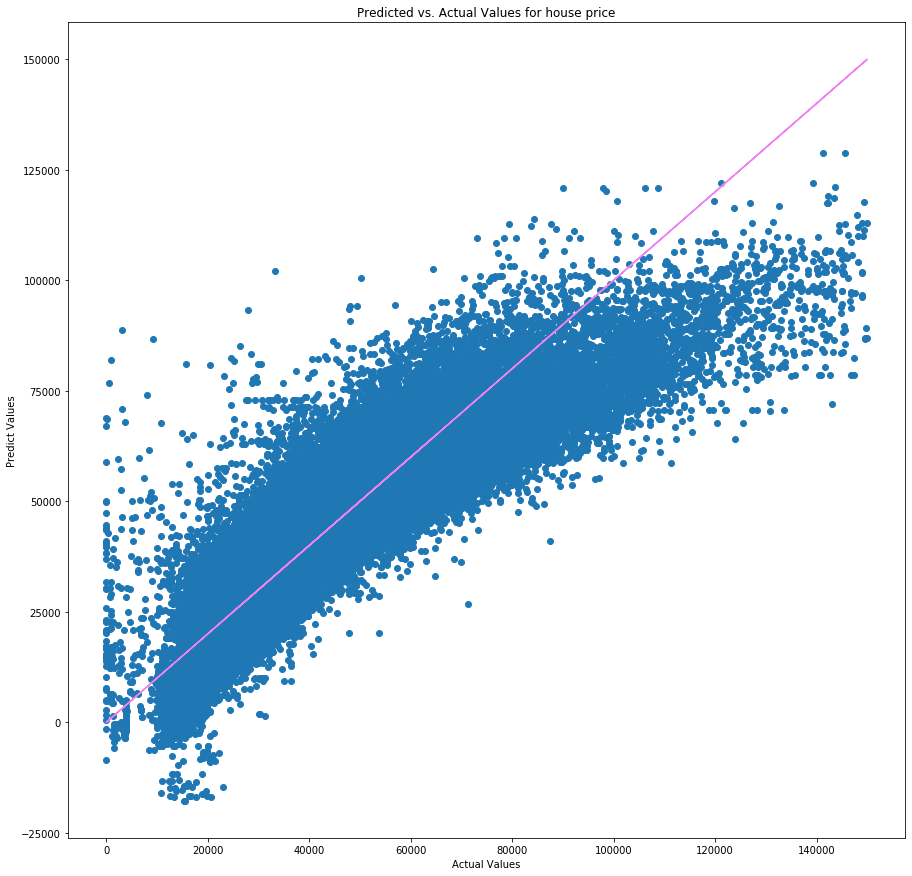

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(y_test, predict_price)
plt.plot(y_test, y_test, color = "violet")
plt.title("Predicted vs. Actual Values for house price")
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.show()

In [0]:
print("Accuracy (scale of 0 to 1): {}".format(train_model.score(X_test, y_test)))

Accuracy (scale of 0 to 1): 0.7703774647784075


From the above graph, we can see the result of closeness of our predicted values and observed values. On a scale from 0 to 1, our model has an accuracy of 0.768. For a model with more than 300,000 entries, this score is considered fairly high. 

##**6. Conclusion**



In this tutorial, we examined several factors that could have impacts on housing prices in Beijing from 2002 to 2018. With what we learned from CMSC320 throughout the semester, we were able to walk through the entire data science pipeline, including data collection, data processing, exploratory analysis and visualization, hypothesis testing and machine learning.

Through our analysis, we have found out that the housing price in Beijing is not affected by one but several factors, and with our hypothesis test, we were able to reject the null hypothesis that they have no impact on housing price. The factors include the environment around the house, the internal structure of the house, the district in which the house is located, and lastly, the year of transaction. More specifically, we have established that the price is influenced by year, renovation condition, subway, district, and community average. We have also created a machine learning model that is able to predict the housing prices given the factors mentioned above, with an accuracy of 0.768. 

For more analysis and insights on the housing prices in Beijing, we encourage you to check out some academic journals on this topic, including [this article](https://www.sciencedirect.com/science/article/pii/S1878029610001374). Also, policy changes by the Beijing or central government have historically made large impact on the housing prices, and we would encourage you to keep an eye on the news if this topic fascinates you.


